In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## 1 symulacja

- A*k*dt - prawdopodobieństwo zajścia reakcji w czasie t + dt
    - A - ilość cząsteczek A
    - k - szybkość reakcji


- losujemy liczbe z rozkładu jednorodnego (0,1) 
    - jeśli mniejsza od A*k*dt to reakcja zachodzi
    - jeśli nie to nie zachodzi

- jeśli reakcja zachodzi to zmniejszamy A o 1 i zwiększamy czas o dt

- jeśli nie zachodzi to zwiększamy czas o dt

- jeśli A = 0 to koniec symulacji

In [2]:
def reakcja(A_start: int, k: float, dt: float, max_t: float):
    ilosc_czasteczek = [A_start]
    czas = [0]

    A = A_start


    while czas[-1] < max_t:
        losowa_liczba = np.random.uniform(0,1)
        prawd_reakcji = A * k * dt

        if losowa_liczba < prawd_reakcji:
            A -= 1
        
        ilosc_czasteczek.append(A)
        czas.append(czas[-1] + dt)

        if ilosc_czasteczek[-1] == 0:
            break

    return np.array(ilosc_czasteczek), np.array(czas)
    

In [3]:
def pokaz_reakcje(ilosc_czasteczek: np.ndarray, czas: np.ndarray, k: float):
    plt.plot(czas, ilosc_czasteczek, label=f"k={k}")
    plt.xlabel("Czas [t]")
    plt.ylabel("Ilość cząsteczek")
    plt.title("Symulacja reakcji 1")
    plt.legend()
    plt.show()  

In [4]:
A_start = 1000
k = 0.1
dt = 0.01
max_t = 100

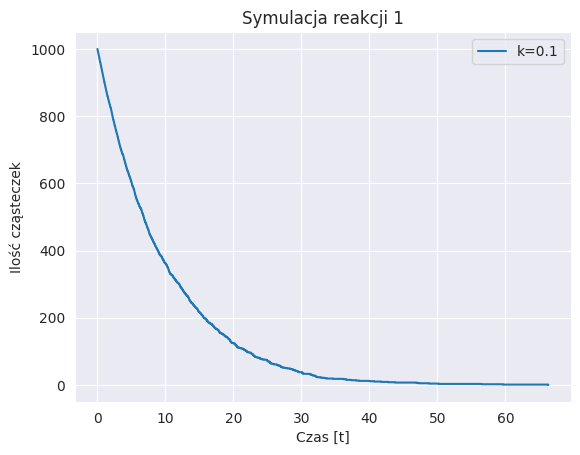

In [5]:
pokaz_reakcje(*reakcja(A_start=A_start, k=k, dt=dt, max_t=max_t), k=k)

## 2 Symulacja

- Wykonać n symulacji
- Zrobić średnią z symulacji
- Wyplotować

In [6]:
def n_reakcji(n: int):
    lista_ilosci_czasteczek = []
    lista_czasow = []
    for _ in range(n):
        ilosc_czasteczek, czas = reakcja(A_start=A_start, k=k, dt=dt, max_t=max_t)
        lista_ilosci_czasteczek.append(ilosc_czasteczek)
        lista_czasow.append(czas)

    return lista_ilosci_czasteczek, lista_czasow

In [7]:
lista_ilosci_czasteczek, lista_czasow = n_reakcji(n=10)

In [11]:
def pokaz_n_reakcji(lista_ilosci_czasteczek, lista_czasow):

    for (ilosc_czasteczek, czas) in zip(lista_ilosci_czasteczek, lista_czasow):
        plt.plot(czas, ilosc_czasteczek)

    plt.show()

In [29]:
def srednia_n_reakcji(lista_ilosci_czasteczek, lista_czasow):
    minimalna_dlugosc = min([len(czas) for czas in lista_czasow])
    # Initialize arrays for average calculation
    skrocone_czasy = np.linspace(0, minimalna_dlugosc * dt, minimalna_dlugosc)
    srednie_ilosci = np.zeros(minimalna_dlugosc)
    
    # Truncate each array to the minimum length and sum them
    for i in range(len(lista_ilosci_czasteczek)):
        srednie_ilosci += lista_ilosci_czasteczek[i][:minimalna_dlugosc]
    
    # Calculate the mean by dividing by the number of simulations
    srednie_ilosci = srednie_ilosci / len(lista_ilosci_czasteczek)

    
    # Plot the average
    plt.figure(figsize=(10, 6))
    for (ilosc_czasteczek, czas) in zip(lista_ilosci_czasteczek, lista_czasow):
        plt.plot(czas, ilosc_czasteczek)
    plt.plot(skrocone_czasy, srednie_ilosci, 'r-', linewidth=2)
    plt.xlabel("Czas [t]")
    plt.ylabel("Średnia ilość cząsteczek")
    plt.title(f"Średnia z {len(lista_ilosci_czasteczek)} symulacji reakcji")
    plt.grid(True)
    plt.show()
    
    return skrocone_czasy, srednie_ilosci

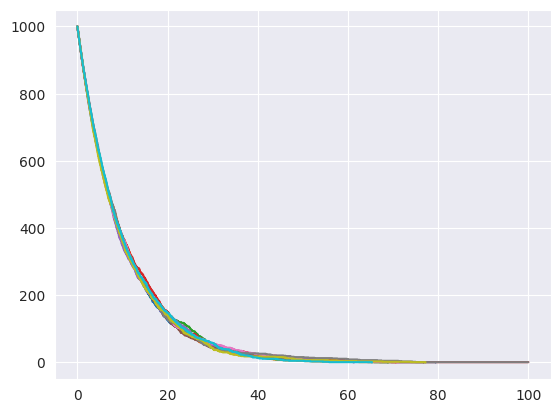

In [12]:
pokaz_n_reakcji(lista_ilosci_czasteczek, lista_czasow)

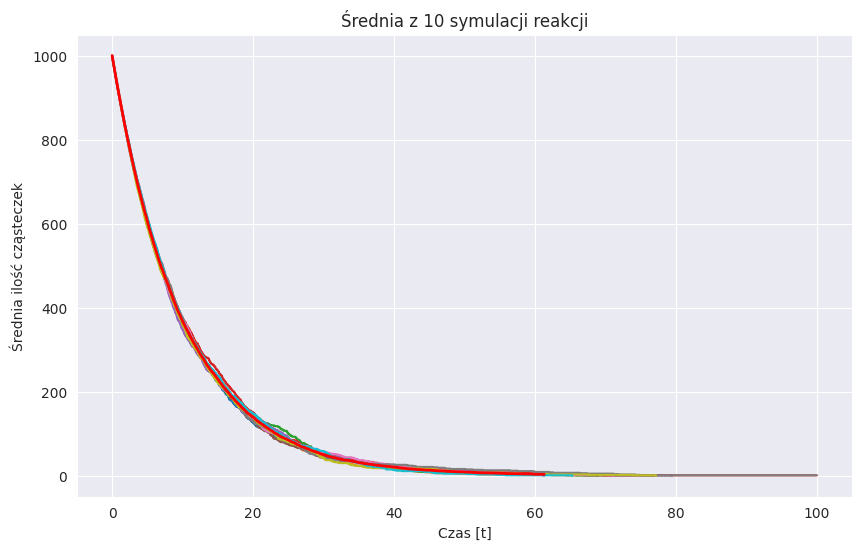

(array([0.00000000e+00, 1.00016305e-02, 2.00032610e-02, ...,
        6.13199967e+01, 6.13299984e+01, 6.13400000e+01], shape=(6134,)),
 array([1000. ,  999. ,  998. , ...,    3.2,    3.2,    3.1], shape=(6134,)))

In [28]:
srednia_n_reakcji(lista_ilosci_czasteczek, lista_czasow)

## 3 Symulacja



In [43]:
def reaction_simulation3(var, k, A_start, max_t=100):
    '''
    Arguments:
    k: reaction rate constant
    A_start: initial number of reactant A molecules
    max_t: maximum simulation time

    Returns:
    time: A numpy array of simulation times
    A_list: A numpy array of number of A molecules
    '''
    
    # list for storing simulation time
    time = [0]
    # list for storing number of A molecules
    A_list = [A_start]
    
    A = A_start

    # while loop for simulation
    while time[-1] < max_t:
        # generate random numbers between 0 and 1
        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)

        l0 = A*k + var*k  # total propensity

        T = 1/(A*k)*np.log(1/r1)  # time to reaction
        
        # determine reaction type (creation or destruction)
        if r2 < var*k/l0:
            A = A + 1
        else:
            A = A - 1

        # update time
        time.append(time[-1] + T)
        
        # append current number of A molecules to list
        A_list.append(A)
        
        # if A is 0, break the loop
        if A <= 0:
            break

    # convert lists to numpy arrays
    time = np.array(time)
    A_list = np.array(A_list)

    return time, A_list

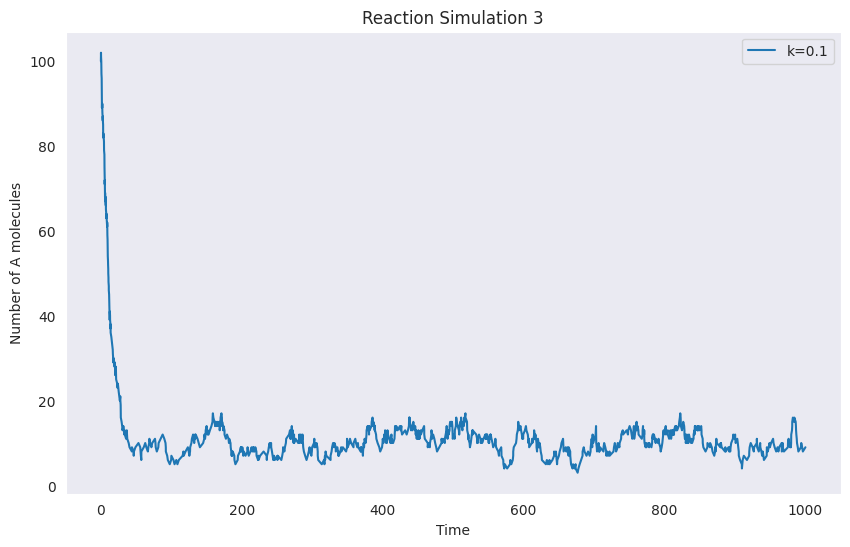

Średnia liczba cząstek: 16.54029304029304


In [44]:
k, A_start, max_t = 0.1, 100, 1000

# Run simulation with existing parameters
time, A_list = reaction_simulation3(10, k, A_start, max_t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, A_list, label=f'k={k}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of A molecules')
plt.title('Reaction Simulation 3')
plt.grid()
plt.show()

# Calculate mean number of molecules
print(f'Średnia liczba cząstek: {np.mean(A_list)}')

In [45]:
def run_multiple_simulations(var, k, A_start, max_t=1000, num_simulations=10):
    """
    Run multiple simulations of the reaction using the reaction_simulation3 function
    and plot the results including the mean trajectory.
    
    Parameters:
    -----------
    k : float
        Reaction rate constant
    A_start : int
        Initial number of reactant A molecules
    max_t : float
        Maximum simulation time
    num_simulations : int
        Number of simulations to run
    
    Returns:
    --------
    tuple
        (common_time, mean_A) - arrays containing the time points and mean number of molecules
    """
    # Lists to store results from multiple simulations
    all_A_lists = []
    all_times = []

    # Run multiple simulations
    for i in range(num_simulations):
        time, A_list = reaction_simulation3(var, k, A_start, max_t)
        all_A_lists.append(A_list)
        all_times.append(time)

    # Plot individual simulations
    plt.figure(figsize=(12, 7))
    for i, (time, A_list) in enumerate(zip(all_times, all_A_lists)):
        plt.plot(time, A_list, alpha=0.3, label=f'Simulation {i+1}' if i == 0 else "")

    # Calculate average - we need to interpolate to a common time axis
    common_time = np.linspace(0, max_t, 1000)
    interpolated_A_lists = []

    for time, A_list in zip(all_times, all_A_lists):
        # Only interpolate up to the end of each simulation
        valid_range = common_time <= time[-1]
        interp_values = np.interp(common_time[valid_range], time, A_list)
        
        # Create full array with NaNs for times beyond simulation end
        full_interp = np.full_like(common_time, np.nan, dtype=float)
        full_interp[valid_range] = interp_values
        interpolated_A_lists.append(full_interp)

    # Calculate mean, ignoring NaN values
    mean_A = np.nanmean(interpolated_A_lists, axis=0)

    # Plot the mean
    plt.plot(common_time, mean_A, 'r-', linewidth=2, label='Mean')

    plt.xlabel('Time')
    plt.ylabel('Number of A molecules')
    plt.title(f'Multiple Simulations (n={num_simulations})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate overall mean number of molecules
    overall_mean = np.mean([np.mean(A_list) for A_list in all_A_lists])
    print(f'Overall mean number of molecules: {overall_mean:.2f}')
    
    return common_time, mean_A


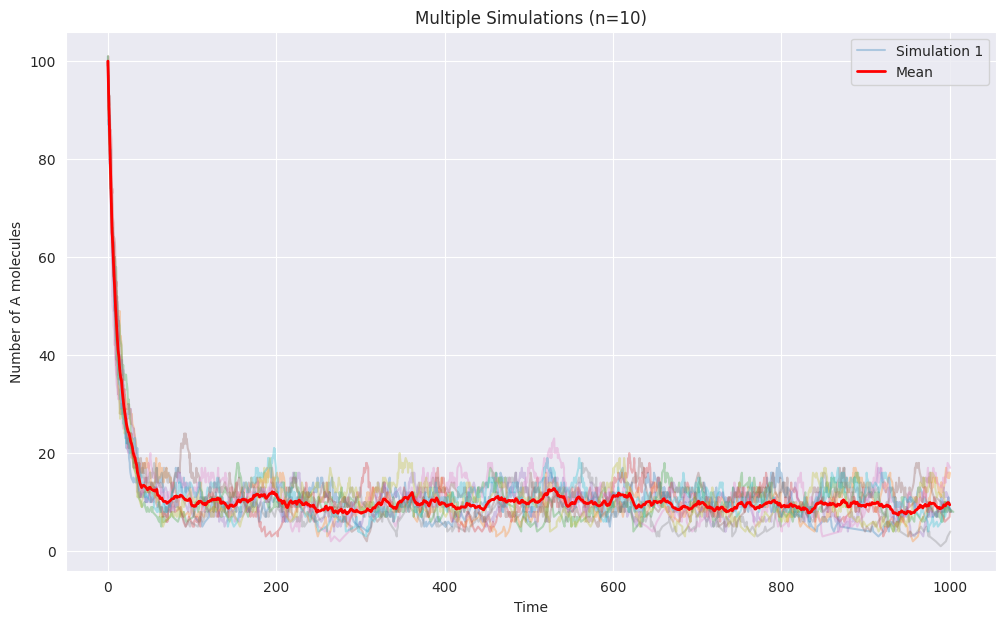

Overall mean number of molecules: 16.16


In [46]:
common_time, mean_A = run_multiple_simulations(var=10,k=0.1, A_start=100, max_t=1000, num_simulations=10)

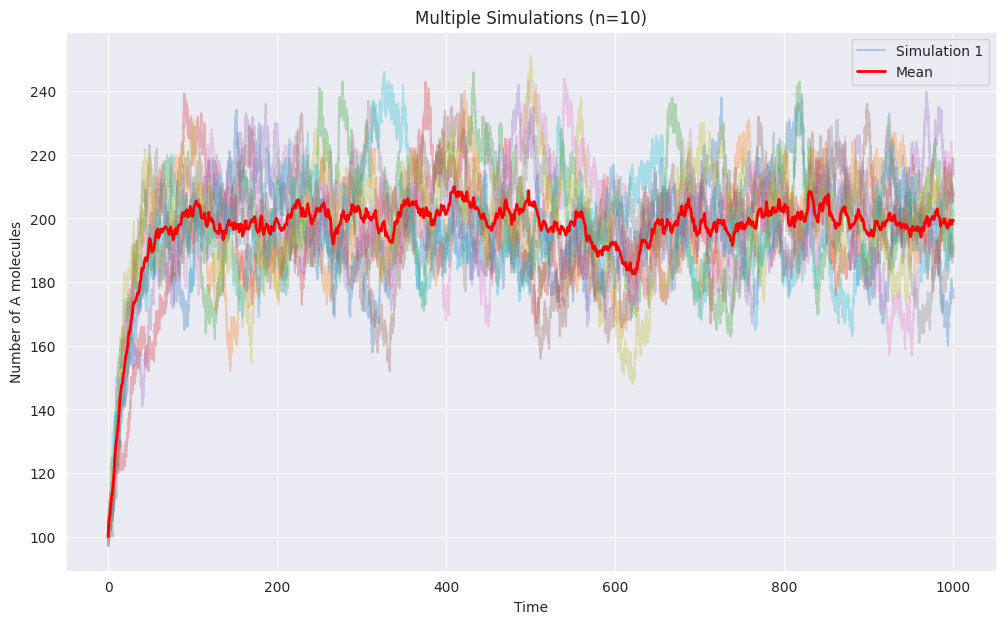

Overall mean number of molecules: 198.47


In [47]:
common_time, mean_A = run_multiple_simulations(var=200,k=0.1, A_start=100, max_t=1000, num_simulations=10)